# Suncal API User Manual - Getting Started


## Overview

Suncal provides a Python package for computing statistics used in metrology, including uncertainty propagation via the GUM method, false accept and reject risk and guardbanding calculations, uncertainty in curve fitting problems, and optimization of calibration intervals.

## Setup

Suncal can be installed in a Python environment using the pip package manager:
    
        pip install suncal

Several dependency packages, including numpy, scipy, sympy, and matplotlib, will be installed if not already present in the environment.

## Importing

To use Suncal in your code, import it with:

In [1]:
import suncal

## Calculation Overview

### Uncertainty Propagation

The primary use for Suncal is propagating uncertainty through a measurement model defined by $y = f(x_1, x_2, ...)$.
The uncertianty each $x_n$ is defined, and the uncertainty $u(y)$ in the output $y$ is determined using the GUM methods.

Start by creating a measurement model using `suncal.Model`, giving the function as a string.
Then access each input variable using `suncal.Model.var()` with `.measure()` to defined the measuerd or nominal value of the variable, and `.typeb()` to define one or more Type B uncertainty components. Finally, call `.calculate()` to calculate the results of both GUM and Monte Carlo methods.

In [2]:
model = suncal.Model('R = V/I')
model.var('V').measure(100).typeb(unc=1, k=2)
model.var('I').measure(2).typeb(unc=.01, k=2)
model.calculate()

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$R$   | GUM          | 50.00  | 0.28           | ± 0.55     | 1.960     | inf           |
|$R$   | Monte Carlo  | 50.00  | 0.28           | (49.45, 50.55) | 1.960     | -             |

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$R$   | GUM          | 50.00  | 0.28           | ± 0.55     | 1.960     | inf           |
|$R$   | Monte Carlo  | 50.00  | 0.28           | (49.45, 50.55) | 1.960     | -             |

In general, Suncal's `calculate` methods return a results object that contains various parameters generated from the calculation and some methods for manipulating them. If the code is run in a Jupyter notebook, the
results object displays a formatted table or plot of the results. The next line demonstrates capturing the result so the details may be accessed. In case of the standard `suncal.Model`, the result contains a `gum` and `montecarlo` result.

In [3]:
result = model.calculate()
result.gum.uncertainty

{'R': 0.2795084971874737}

{'R': 0.2795084971874737}

In [4]:
result.montecarlo.uncertainty

{'R': 0.2794173136496428}

{'R': 0.2794173136496428}

In addition to the values that were computed, every result object contains a `report` attribute that provides formatting of the result into tables and plots. The `report.summary()` is what is displayed in Jupyter to represent the results by default as shown above. Some other reports and plots are shown below.

In [5]:
result.report.sensitivity()

|Variable   | GUM Sensitivity   | GUM Proportion   | MC Sensitivity   | MC Proportion  |
|----------|-----------------|----------------|----------------|---------------|
|$I$   | -25.0          | 20.00%           | 25.0         | 20.00%         |
|$V$   | 0.50          | 80.00%           | 0.50         | 79.99%         |

|Variable   | GUM Sensitivity   | GUM Proportion   | MC Sensitivity   | MC Proportion  |
|----------|-----------------|----------------|----------------|---------------|
|$I$   | -25.0          | 20.00%           | 25.0         | 20.00%         |
|$V$   | 0.50          | 80.00%           | 0.50         | 79.99%         |

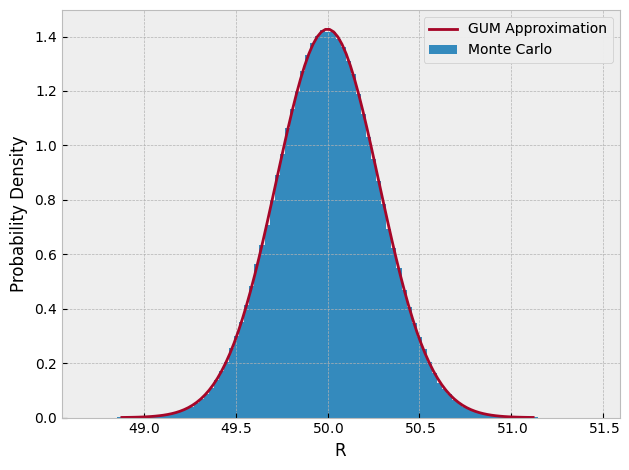

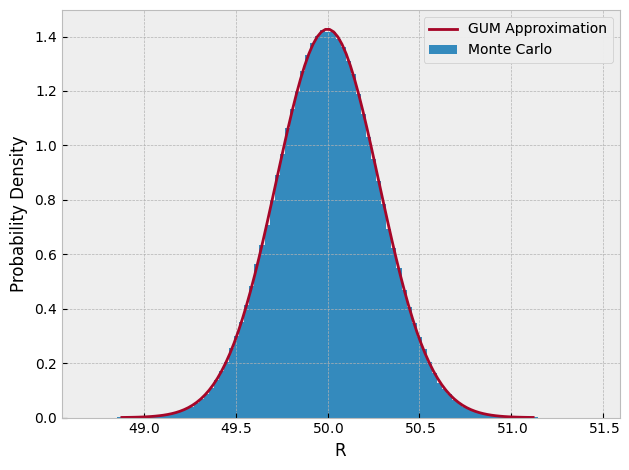

In [6]:
result.report.plot.pdf()

In [7]:
result.report.gum.derivation()

### Measurement Model:

$R = \frac{V}{I}$

### Measured Values:


|Variable   | Std. Uncertainty   | Deg. Freedom  |
|----------|------------------|--------------|
|$I$   | $u_{I}$           | $\nu_{I}$      |
|$V$   | $u_{V}$           | $\nu_{V}$      |


### Sensitivity Coefficients

$\frac{d}{d I} R = - \frac{V}{I^{2}}$

$\frac{d}{d V} R = \frac{1}{I}$

### Combined Uncertainty:

$u_{R} = \sqrt{\frac{u_{V}^{2}}{I^{2}} + \frac{V^{2} u_{I}^{2}}{I^{4}}}$

### Effective degrees of freedom:

$\nu_{R} = \frac{u_{R}^{4}}{\frac{u_{V}^{4}}{I^{4} \nu_{V}} + \frac{V^{4} u_{I}^{4}}{I^{8} \nu_{I}}}$

### Measurement Model:

$R = \frac{V}{I}$

### Measured Values:


|Variable   | Std. Uncertainty   | Deg. Freedom  |
|----------|------------------|--------------|
|$I$   | $u_{I}$           | $\nu_{I}$      |
|$V$   | $u_{V}$           | $\nu_{V}$      |


### Sensitivity Coefficients

$\frac{d}{d I} R = - \frac{V}{I^{2}}$

$\frac{d}{d V} R = \frac{1}{I}$

### Combined Uncertainty:

$u_{R} = \sqrt{\frac{u_{V}^{2}}{I^{2}} + \frac{V^{2} u_{I}^{2}}{I^{4}}}$

### Effective degrees of freedom:

$\nu_{R} = \frac{u_{R}^{4}}{\frac{u_{V}^{4}}{I^{4} \nu_{V}} + \frac{V^{4} u_{I}^{4}}{I^{8} \nu_{I}}}$

Reports take some keyword arguments to help with formatting. Use `n` to specify the number of significant figures to display on uncertainties. The Nominal value is displayed with the same decimal precision as the uncertainty to `n` significant figures.v
The `fmt` parameter sets a specific number format, for example `scientific` uses scientific notation, `decimal` forces non-scientific notation, and 'auto' (the default) switches between the two based on the magnitude of the value. Other options are `engineering` (scientific notation with exponent a multiple of 3) and `SI` (use SI prefixes).

In [8]:
result.report.summary(n=4)

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$R$   | GUM          | 50.0000  | 0.2795           | ± 0.5478     | 1.960     | inf           |
|$R$   | Monte Carlo  | 50.0000  | 0.2794           | (49.4537, 50.5472) | 1.957     | -             |

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$R$   | GUM          | 50.0000  | 0.2795           | ± 0.5478     | 1.960     | inf           |
|$R$   | Monte Carlo  | 50.0000  | 0.2794           | (49.4537, 50.5472) | 1.957     | -             |

In [9]:
result.report.summary(fmt='scientific')

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$R$   | GUM          | 5.000e+01  | 2.8e-01           | ± 5.5e-01     | 1.960     | inf           |
|$R$   | Monte Carlo  | 5.000e+01  | 2.8e-01           | (4.945e+01, 5.055e+01) | 1.957     | -             |

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$R$   | GUM          | 5.000e+01  | 2.8e-01           | ± 5.5e-01     | 1.960     | inf           |
|$R$   | Monte Carlo  | 5.000e+01  | 2.8e-01           | (4.945e+01, 5.055e+01) | 1.957     | -             |

For full details of the Results and Reports available from each calculation type, see the other `User Manual - ` notebooks.